In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

INTERIM_DATA_PATH = '../data/interim/parsed_data.pkl'

df = pd.read_pickle(INTERIM_DATA_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              16733 non-null  object 
 1   year               16733 non-null  Int64  
 2   model              16733 non-null  object 
 3   usedornew          16733 non-null  object 
 4   transmission       16482 non-null  object 
 5   engine             14951 non-null  float64
 6   drivetype          16733 non-null  object 
 7   fueltype           16096 non-null  object 
 8   fuelconsumption    15036 non-null  float64
 9   kilometres         16142 non-null  float64
 10  cylindersinengine  15059 non-null  float64
 11  bodytype           16452 non-null  object 
 12  doors              15130 non-null  float64
 13  seats              15029 non-null  float64
 14  price              16681 non-null  float64
 15  city               16284 non-null  object 
 16  state              162

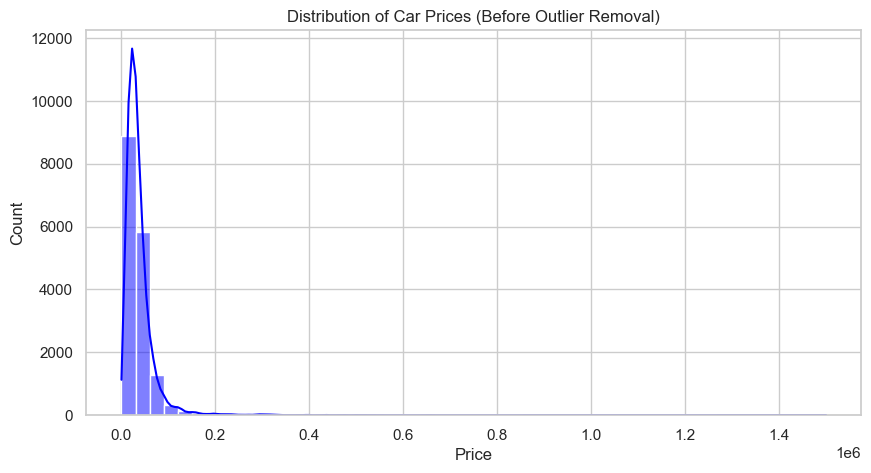

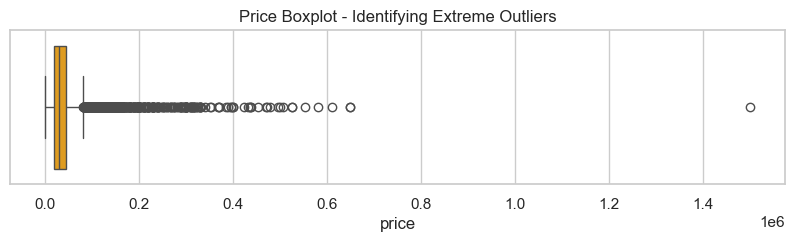

In [11]:
# 1. Histogram of Price
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Car Prices (Before Outlier Removal)')
plt.xlabel('Price')
plt.show()

# 2. Boxplot of Price (Visualizing Outliers)
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price'], color='orange')
plt.title('Price Boxplot - Identifying Extreme Outliers')
plt.show()

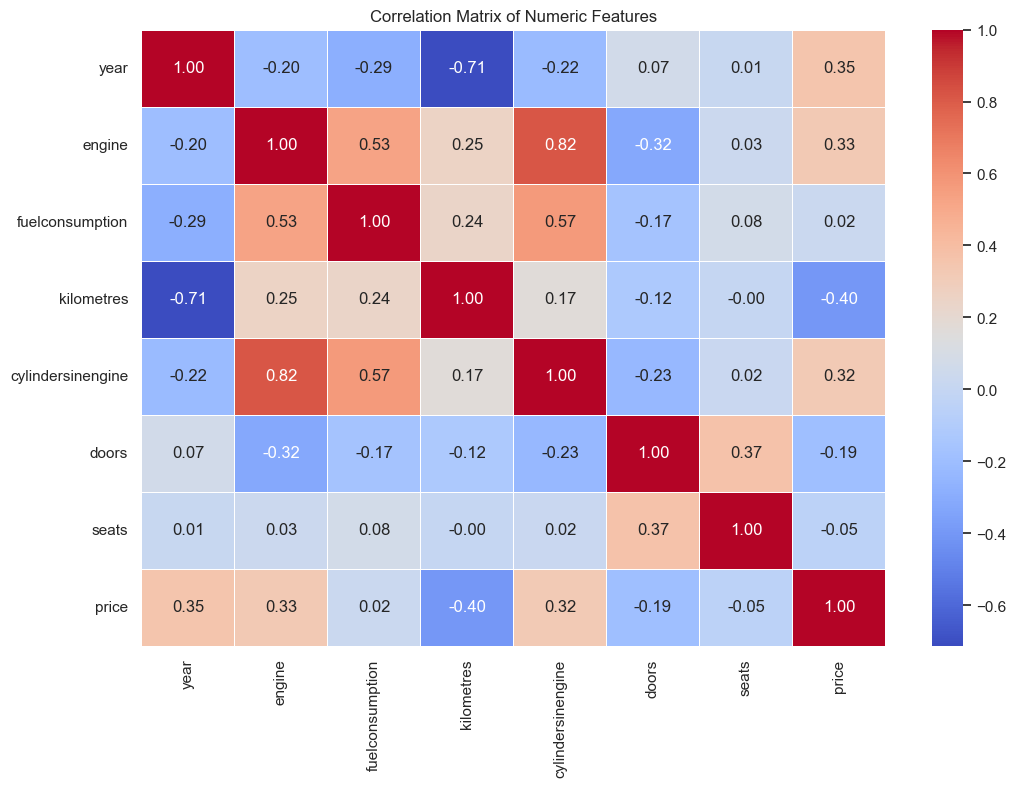

In [12]:
# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
# Correlation Heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

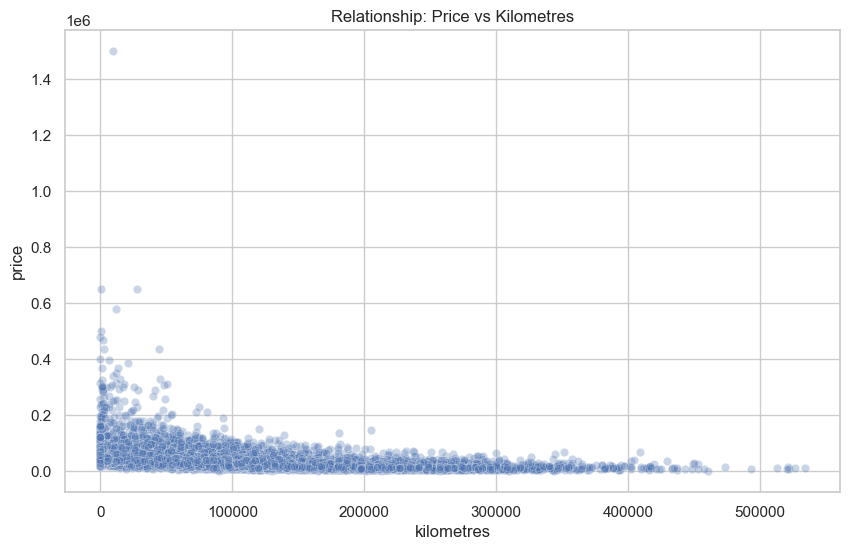

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='kilometres', y='price', alpha=0.3) 
plt.title('Relationship: Price vs Kilometres')
plt.show()

C:\Users\drasz\AppData\Local\Temp\ipykernel_21868\3091033644.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_brands, x='brand', y='price', order=sorted_index, palette='viridis')


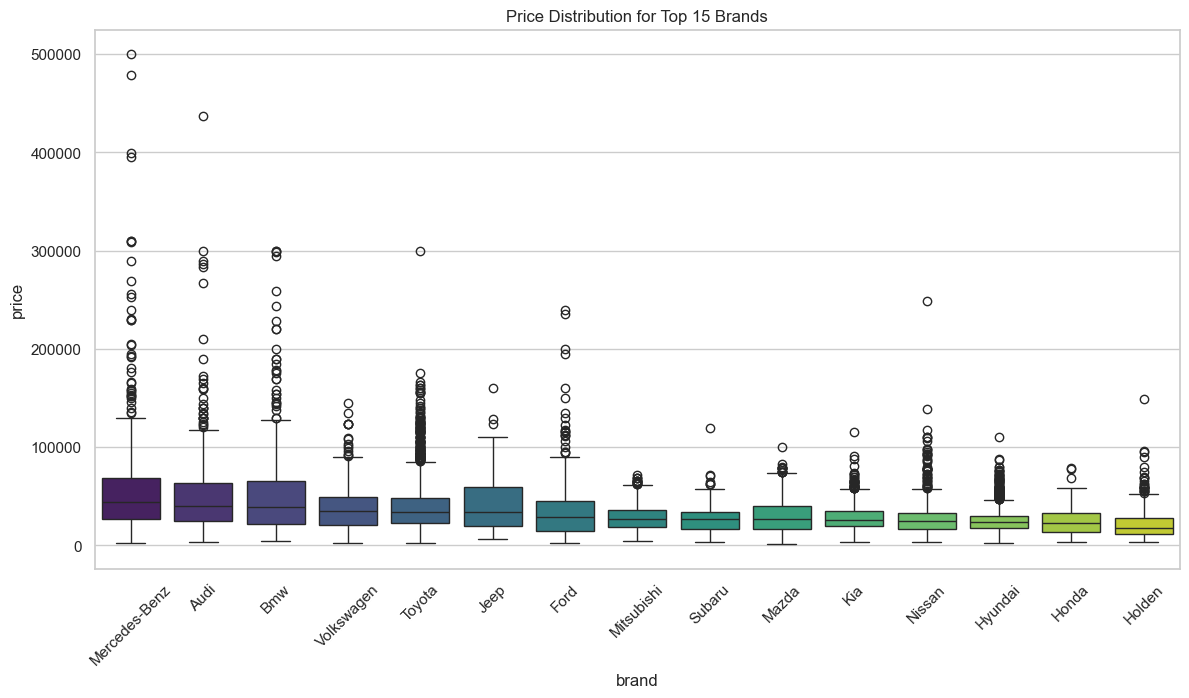

In [14]:
top_brands = df['brand'].value_counts().nlargest(15).index
df_top_brands = df[df['brand'].isin(top_brands)]

plt.figure(figsize=(14, 7))
sorted_index = df_top_brands.groupby('brand')['price'].median().sort_values(ascending=False).index

sns.boxplot(data=df_top_brands, x='brand', y='price', order=sorted_index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Price Distribution for Top 15 Brands')
plt.show()

In [15]:
print(f"Data size before cleaning: {len(df)} records")

PRICE_MAX = 300000
PRICE_MIN = 2000
KM_MAX = 400000
YEAR_MIN = 1990

df_clean = df[
    (df['price'] < PRICE_MAX) &
    (df['price'] > PRICE_MIN) &
    (df['kilometres'] < KM_MAX) &
    (df['year'] >= YEAR_MIN)
].copy()

print(f"Data size after cleaning: {len(df_clean)} records")
print(f"Records removed: {len(df) - len(df_clean)}")

Data size before cleaning: 16734 records
Data size after cleaning: 16017 records
Records removed: 717


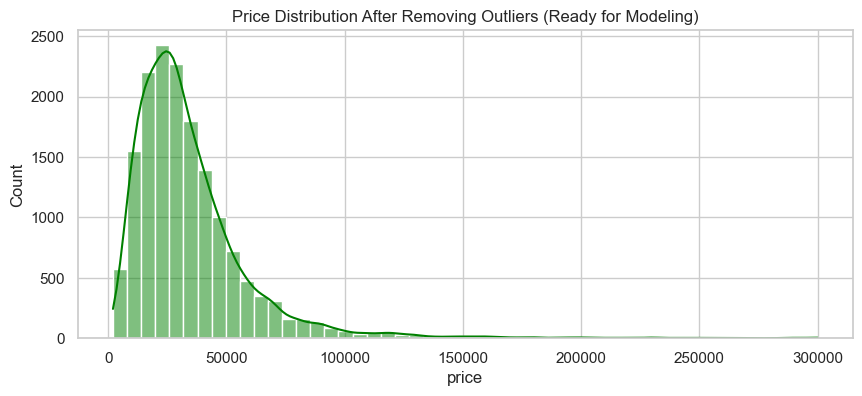

In [16]:
plt.figure(figsize=(10, 4))
sns.histplot(df_clean['price'], bins=50, kde=True, color='green')
plt.title('Price Distribution After Removing Outliers (Ready for Modeling)')
plt.show()

In [17]:
df_clean.to_pickle('../data/processed/cleaned_data.pkl')